# stocks
analysis on all stocks over different time frames

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import *
from algs import *
from plot import *

In [2]:
# get symbols list
csvs = os.listdir('data')
symbols = [os.path.splitext(csv)[0] for csv in csvs]

In [ ]:
# generate results from symbols
results = []
for i, symbol in enumerate(symbols):
    if i % 25 == 0:
        #print(i)
    # get df
    full_df = get_full_df(symbol)
    df = get_years(full_df)
    # get max sub results
    result = find_maximum_subarray(df.change)
    # replace high low index with date
    result['low'] = df.index[result['low']]
    result['high'] = df.index[result['high']]
    # add symbol to dict
    result['symbol'] = symbol
    results.append(result)
results_df = pd.DataFrame(results)

In [3]:
df = pd.read_csv('full_results.csv', index_col=0)

# get 
min_date = pd.date_range(min(df.low), periods=1)[0]
max_date = pd.date_range(max(df.high), periods=1)[0]
print(min_date, max_date)

# load sp500 df
sp500 = pd.read_csv('sp500.csv', index_col=0)
sp500.index = pd.to_datetime(sp500.index)

# trim to date range
sp500 = sp500[sp500.index >= min_date]
sp500 = sp500[sp500.index <= max_date]
print(sp500.shape)

1998-01-05 00:00:00 2019-03-28 00:00:00
(5342, 6)


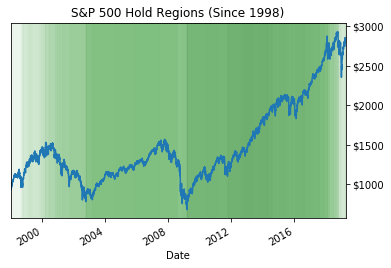

In [4]:
# plot
fig, ax = plt.subplots()
sp500['Adj Close'].plot()

# add dollar sign to y axis labels
formatter = ticker.FormatStrFormatter('$%.f')
ax.yaxis.set_major_formatter(formatter)

# put dollar amount labels on the right
ax.tick_params(left=False, right=True)
for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True

# add highlight box for hold period
for i, row in df[150:250].iterrows():
    plt.axvspan(row.low, row.high, color='green', alpha=0.006)

plt.title('S&P 500 Hold Regions (Since 1998)')
plt.savefig('sp500full.png', dpi=1000)
plt.show()